In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler as MM

In [2]:
class Data :

    def __init__(self) :
        self.dataframe = pd.DataFrame([])

    #Read data from CSV dataset(s)
    def read(self, filename : str) :
        """Reads values/data from CSV files into dataframe"""
        if os.path.exists(filename) :
            self.dataframe = pd.read_csv(filename, skiprows = 1)
            print(f"Data successfully read from {filename}.")
        else :
            print(f"Error: The file {filename} does not exist.")

    #Check for null values in the dataset(s)
    def check_null_values(self) :
        """Checks for null values in the dataframe."""
        print("Null Values Before Cleaning:")
        print(self.dataframe.isnull().sum())

    #Cleaning the dataset :
    def clean_dataset(self) :
        """Cleans the dataset by removing null values"""
        if self.dataframe is not None :
            original_shape = self.dataframe.shape #store the original shape of the DataFrame
            self.dataframe = self.dataframe.dropna() #drop all rows with null values; dropna() is a Pandas method that, by default, drops all rows that contain at least one null value.
            cleaned_shape = self.dataframe.shape #store the cleaned shape of DataFrame
            print(f"Dataset cleaned. Original shape: {original_shape}, Cleaned shape: {cleaned_shape}.")
        else:
            print("Error: No data to clean. Please read a dataset first.")

    
    # Normalize the data
    def normalize(self):
        """Normalizes numeric columns in the dataframe"""
        # Select columns to scale
        columns_to_scale = ['ACTUAL (mm)']

        # Strip trailing spaces from DataFrame column names
        self.dataframe.columns = self.dataframe.columns.str.strip()

        # Ensure all specified columns are in the DataFrame
        columns_to_scale = [col for col in columns_to_scale if col in self.dataframe.columns]

        if columns_to_scale:
            # Select the data to scale
            data_to_scale = self.dataframe[columns_to_scale]

            # Initialize the MinMaxScaler
            self.scaler = MM()

            # Fit and transform the data
            scaled_data = self.scaler.fit_transform(data_to_scale)

            # Update the DataFrame with the scaled data
            self.dataframe[columns_to_scale] = scaled_data

            print("Data successfully normalized:")
            print(self.dataframe.head())
        else:
            print("Error: No columns to normalize. Please ensure the dataframe contains the necessary columns.")
    

    def visualize_normal(self) :
      """Plot graph for NORMAL (mm) stock values v/s dates"""
      if 'Dates' in self.dataframe.columns and 'NORMAL (mm)' in self.dataframe.columns:
            self.dataframe['Dates'] = pd.to_datetime(self.dataframe['Dates'])
            plt.figure(figsize = (14, 7))
            plt.plot(self.dataframe['Dates'], self.dataframe['NORMAL (mm)'], label = 'NORMAL (mm)')
            plt.title('NORMAL (mm) rainfall over time')
            plt.xlabel('Dates')
            plt.ylabel('NORMAL (mm) rainfall')
            plt.legend()
            plt.show()
      else:
        print("Dates and/or NORMAL (mm) column not found in the dataframe")

    def visualize_actual(self) :
        """Plot graph for ACTUAL (mm) stock values v/s dates"""
        if 'Dates' in self.dataframe.columns and 'ACTUAL (mm)' in self.dataframe.columns :
            self.dataframe['Dates'] = pd.to_datetime(self.dataframe['Dates'])
            plt.figure(figsize = (18, 10))
            plt.plot(self.dataframe['Dates'], self.dataframe['ACTUAL (mm)'], label = 'ACTUAL (mm)')
            plt.title('ACTUAL (mm) rainfall over time')
            plt.xlabel('Dates')
            plt.ylabel('ACTUAL (mm) rainfall')
            plt.legend()
            plt.show()

    def print_head(self):
        """Prints the head of the dataframe."""
        print("Head of the DataFrame:")
        print(self.dataframe.head())

    def print_description(self):
        """Prints the description of the dataframe."""
        print("\nDescription of the DataFrame:")
        print(self.dataframe.describe())

In [3]:
data = Data()

In [4]:
data.read('C:/Users/TATHAGATA GHOSH/Desktop/LSTM_Weather_Flood_Drought/Data/Darjeeling_daily_10y.csv')

Data successfully read from C:/Users/TATHAGATA GHOSH/Desktop/LSTM_Weather_Flood_Drought/Data/Darjeeling_daily_10y.csv.


In [5]:
data.check_null_values()

Null Values Before Cleaning:
Dates           0
NORMAL (mm)     0
ACTUAL (mm)     0
dtype: int64


In [6]:
data.print_head()
data.print_description()

Head of the DataFrame:
         Dates  NORMAL (mm)   ACTUAL (mm) 
0  18-Mar-2014           0.9          0.00
1  19-Mar-2014           1.3          2.59
2  20-Mar-2014           1.4          2.81
3  21-Mar-2014           2.0          4.88
4  22-Mar-2014           1.0          0.17

Description of the DataFrame:
       NORMAL (mm)   ACTUAL (mm) 
count   3617.000000   3617.000000
mean       7.374509      9.417982
std        8.586096     18.815402
min        0.000000      0.000000
25%        0.500000      0.000000
50%        2.800000      0.690000
75%       14.400000     11.120000
max       32.700000    230.430000


In [7]:
data.clean_dataset()

Dataset cleaned. Original shape: (3617, 3), Cleaned shape: (3617, 3).


In [8]:
data.check_null_values()

Null Values Before Cleaning:
Dates           0
NORMAL (mm)     0
ACTUAL (mm)     0
dtype: int64


In [9]:
data.print_head()
data.print_description()

Head of the DataFrame:
         Dates  NORMAL (mm)   ACTUAL (mm) 
0  18-Mar-2014           0.9          0.00
1  19-Mar-2014           1.3          2.59
2  20-Mar-2014           1.4          2.81
3  21-Mar-2014           2.0          4.88
4  22-Mar-2014           1.0          0.17

Description of the DataFrame:
       NORMAL (mm)   ACTUAL (mm) 
count   3617.000000   3617.000000
mean       7.374509      9.417982
std        8.586096     18.815402
min        0.000000      0.000000
25%        0.500000      0.000000
50%        2.800000      0.690000
75%       14.400000     11.120000
max       32.700000    230.430000


In [10]:
data.normalize()

Data successfully normalized:
         Dates  NORMAL (mm)  ACTUAL (mm)
0  18-Mar-2014          0.9     0.000000
1  19-Mar-2014          1.3     0.011240
2  20-Mar-2014          1.4     0.012195
3  21-Mar-2014          2.0     0.021178
4  22-Mar-2014          1.0     0.000738


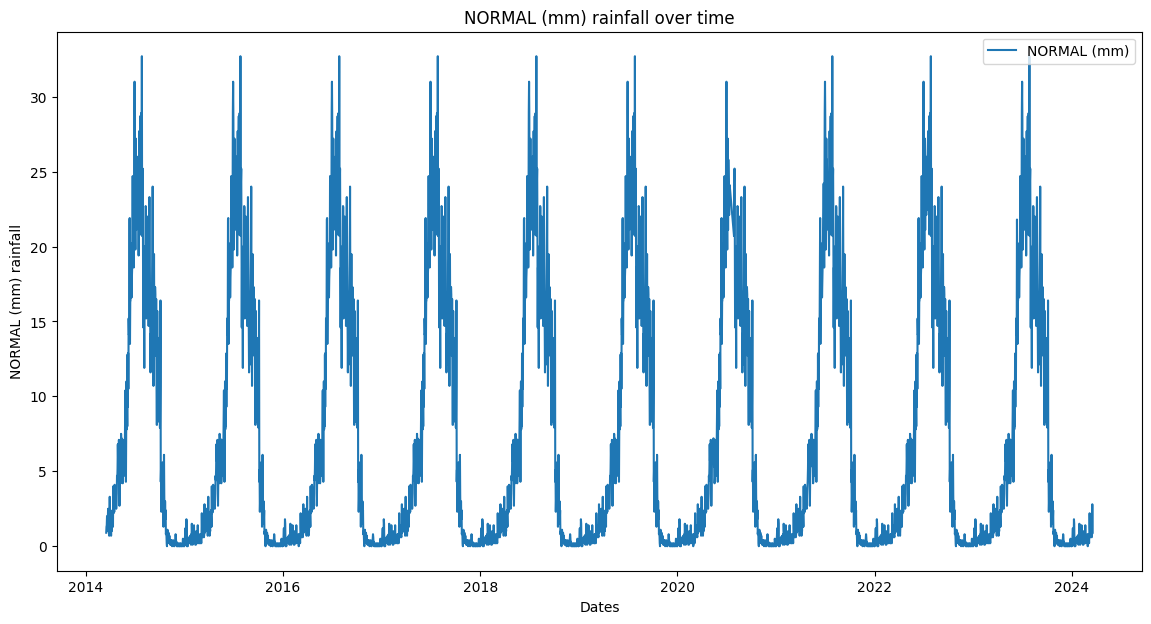

In [11]:
data.visualize_normal()

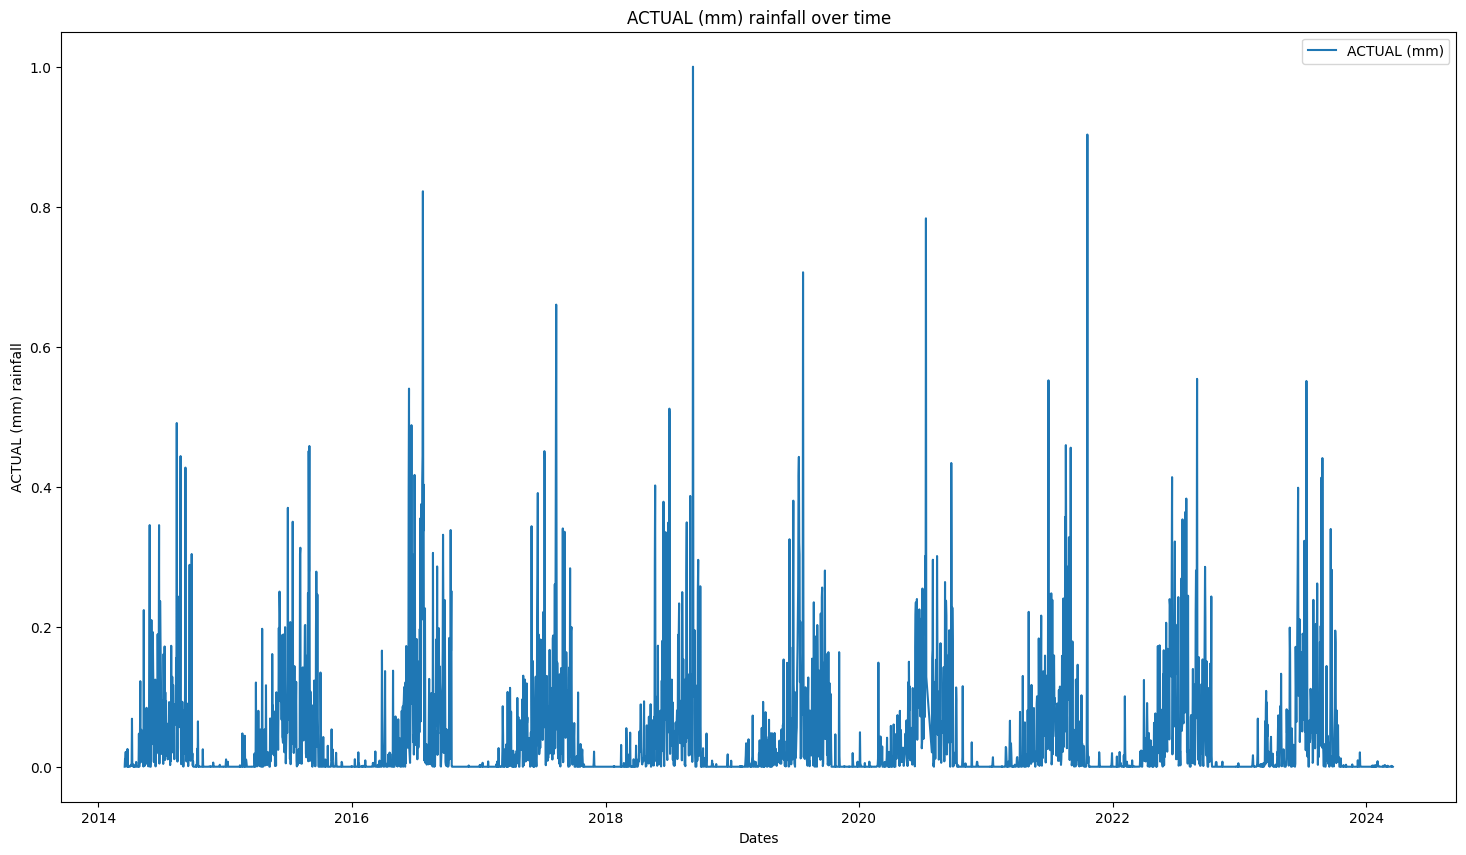

In [12]:
data.visualize_actual()

In [13]:
from tensorflow.keras.models import Sequential as sq
from tensorflow.keras.layers import LSTM, Dense
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.models import load_model as lm
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score
from sklearn.preprocessing import MinMaxScaler as MM
import matplotlib.pyplot as plt

In [14]:
class model_train_lstm_weather :

    def __init__(self, dataframe, scaler) :
        self.dataframe = dataframe
        self.scaler = scaler

    def prep_data_weather(self, feature_col = 'NORMAL (mm)', look_back = 75) :   #"look back" refers to the number of previous time steps that the model uses to make predictions for the next time step.
        """Prepare data for LSTM by creating sequences"""
        data = self.dataframe[feature_col].values     # Extract the feature column values
        data = data.reshape(-1, 1)  # Reshape to (n_samples, 1)
        X, y = [], []
        for i in range(len(data) - look_back):
            X.append(data[i:i + look_back])     # Append sequences of length 'look_back'
            y.append(data[i + look_back])       # Append the next value as the target
        X, y = np.array(X), np.array(y)
        # Split data while preserving the number of features
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)
        return X_train, X_test, y_train, y_test.reshape(-1, 1)

    def build_train_lstm(self, feature_col = 'NORMAL (mm)', look_back = 75, epochs = 200, batch_size = 32) :
        """Build and train the LSTM model"""
        X_train, X_test, y_train, y_test = self.prep_data_weather(feature_col, look_back)

        self.X_train = X_train  # Save the training features
        self.y_train = y_train  # Save the training targets

        model = sq()    # Initialize the model
        model.add(LSTM(units = 100, return_sequences = True, input_shape = (look_back, 1)))
        model.add(LSTM(units = 100, return_sequences = True))   #this layer does not have return_sequences=True, which means it will only return the final output of the sequence, not the full sequence.
        model.add(LSTM(units = 50))
        model.add(Dense(1))     #This is the output layer of the model. Since we are predicting a single value (the next day's stock price), this layer has one neuron.

        #LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)) adds an LSTM layer to the model.
        #50 is the number of units in this LSTM layer, which means the layer will have 50 LSTM cells.
        #return_sequences=True means this layer will return the full sequence of outputs for each input sequence, not just the final output. This is necessary because we are stacking another LSTM layer on top.
        #input_shape = (X_train.shape[1], 1) specifies the shape of the input data for this layer.
        #X_train.shape[1] is the number of time steps (look-back period), and 1 is the number of features (since we are using just one feature, the stock price).

        opti = RMSprop(learning_rate = 0.002)
        model.compile(optimizer = opti, loss = 'mean_squared_error')     # Compile the model using Adam optimizer and mean squared error loss

        # Early stopping callback with patience of 10 epochs
        early_stopping = EarlyStopping(monitor = 'loss', patience = 10, restore_best_weights = True)

        # Train the model with the training data
        self.history = model.fit(self.X_train, self.y_train, epochs = epochs, batch_size = batch_size, validation_data = (X_test, y_test), callbacks = [early_stopping])

        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Model loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc = 'upper right')
        plt.show()

        self.model = model    # Save the trained model
        self.X_test = X_test  # Save the test features
        self.y_test = y_test  # Save the test targets

        

    def predict_plot(self) :
        """Make predictions and plot the results"""
        predictions = self.model.predict(self.X_test)   # Predict the test data
        predictions = predictions.reshape(-1, 1)    # Reshape the predictions

        # Extract the 'NORMAL (mm)' column from the original dataframe
        self.normal_scaler = MM(feature_range = (0, 1))  # Create a new scaler for just the 'ACTUAL (mm)' column
        self.normal_scaler.fit(self.dataframe['ACTUAL (mm)'].values.reshape(-1, 1))  # Fit the scaler to the 'ACTUAL (mm)' column

        # Inverse transform predictions using the scaler fitted on 'ACTUAL (mm)' column
        predictions = self.normal_scaler.inverse_transform(predictions)
        # Inverse transform actual 'ACTUAL (mm)' values
        actual = self.normal_scaler.inverse_transform(self.y_test)

        plt.figure(figsize = (18, 10))
        plt.plot(actual, label = 'ACTUAL rainfall val.')
        plt.plot(predictions, label = 'Predicted ACTUAL rainfall val.')
        plt.title('Actual vs Predicted ACTUAL rainfall val.')
        plt.xlabel('Timestep')
        plt.ylabel('ACTUAL rainfall val.')
        plt.legend()
        plt.show()


    def evaluate_model(self):
        """Calculates and prints evaluation metrics."""
        predictions = self.model.predict(self.X_test)   # Predict the test data
        predictions = self.normal_scaler.inverse_transform(predictions)    # Inverse transform predictions
        actual = self.normal_scaler.inverse_transform(self.y_test)      # Inverse transform actual values

        mse = MSE(actual, predictions)
        rmse = np.sqrt(mse)
        mae = MAE(actual, predictions)
        r2 = r2_score(actual, predictions)

        # Calculate MAPE with handling for zeros in actual values
        mask = actual != 0
        mape = np.mean(np.abs((actual[mask] - predictions[mask]) / actual[mask])) * 100 if np.any(mask) else np.nan

        print(f"Mean Squared Error (MSE): {mse}")
        print(f"Root Mean Squared Error (RMSE): {rmse}")
        print(f"Mean Absolute Error (MAE): {mae}")
        print(f"R-squared (R2): {r2}")

        if not np.isnan(mape):
            print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
            # Adjusted accuracy metric
            accuracy = 100 - mape  # Adjusted accuracy as 100% minus MAPE
            print(f"Adjusted Model Accuracy: {accuracy:.2f}%")
        else:
            print("Mean Absolute Percentage Error (MAPE) cannot be calculated due to division by zero.")

    def save_model(self, model_path = 'C:/Users/TATHAGATA GHOSH/Desktop/LSTM_Weather_Flood_Drought/Core/Pretrained_model/model_rainfall.h5') :
        """Saves the trained model to a file."""
        self.model.save(model_path)
        print(f"Model saved to {model_path}")

    def load_model(self, model_path = 'C:/Users/TATHAGATA GHOSH/Desktop/LSTM_Weather_Flood_Drought/Core/Pretrained_model/model_rainfall.h5') :
        """Loads a saved model from a file."""
        self.model = lm(model_path)
        print(f"Model loaded from {model_path}")

In [15]:
trainer = model_train_lstm_weather(data.dataframe, data.scaler)

Epoch 1/200


c:\Users\TATHAGATA GHOSH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


89/89 ━━━━━━━━━━━━━━━━━━━━ 14s 94ms/step - loss: 45.3846 - val_loss: 12.9003
Epoch 2/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 10.9486 - val_loss: 7.9370
Epoch 3/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 6.5051 - val_loss: 4.8187
Epoch 4/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 8s 89ms/step - loss: 5.2950 - val_loss: 6.0307
Epoch 5/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 5.3184 - val_loss: 4.5097
Epoch 6/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 11s 123ms/step - loss: 4.4657 - val_loss: 5.1111
Epoch 7/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - loss: 4.4234 - val_loss: 4.2223
Epoch 8/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - loss: 4.3100 - val_loss: 3.9325
Epoch 9/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 4.1192 - val_loss: 3.1427
Epoch 10/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 3.5924 - val_loss: 2.9475
Epoch 11/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 3.2162 - val_loss: 3.3144
Epoch 12/200
89/89 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step -

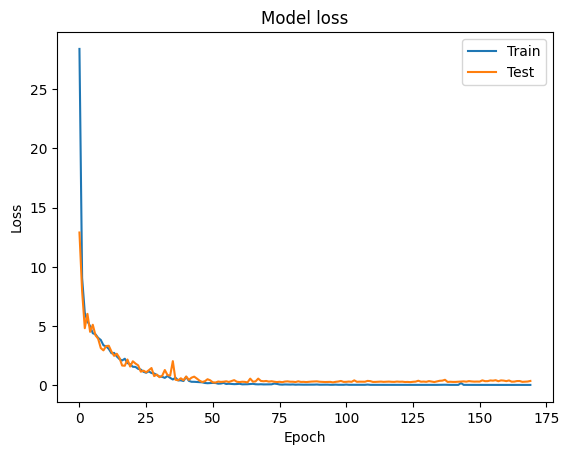

In [16]:
trainer.build_train_lstm()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


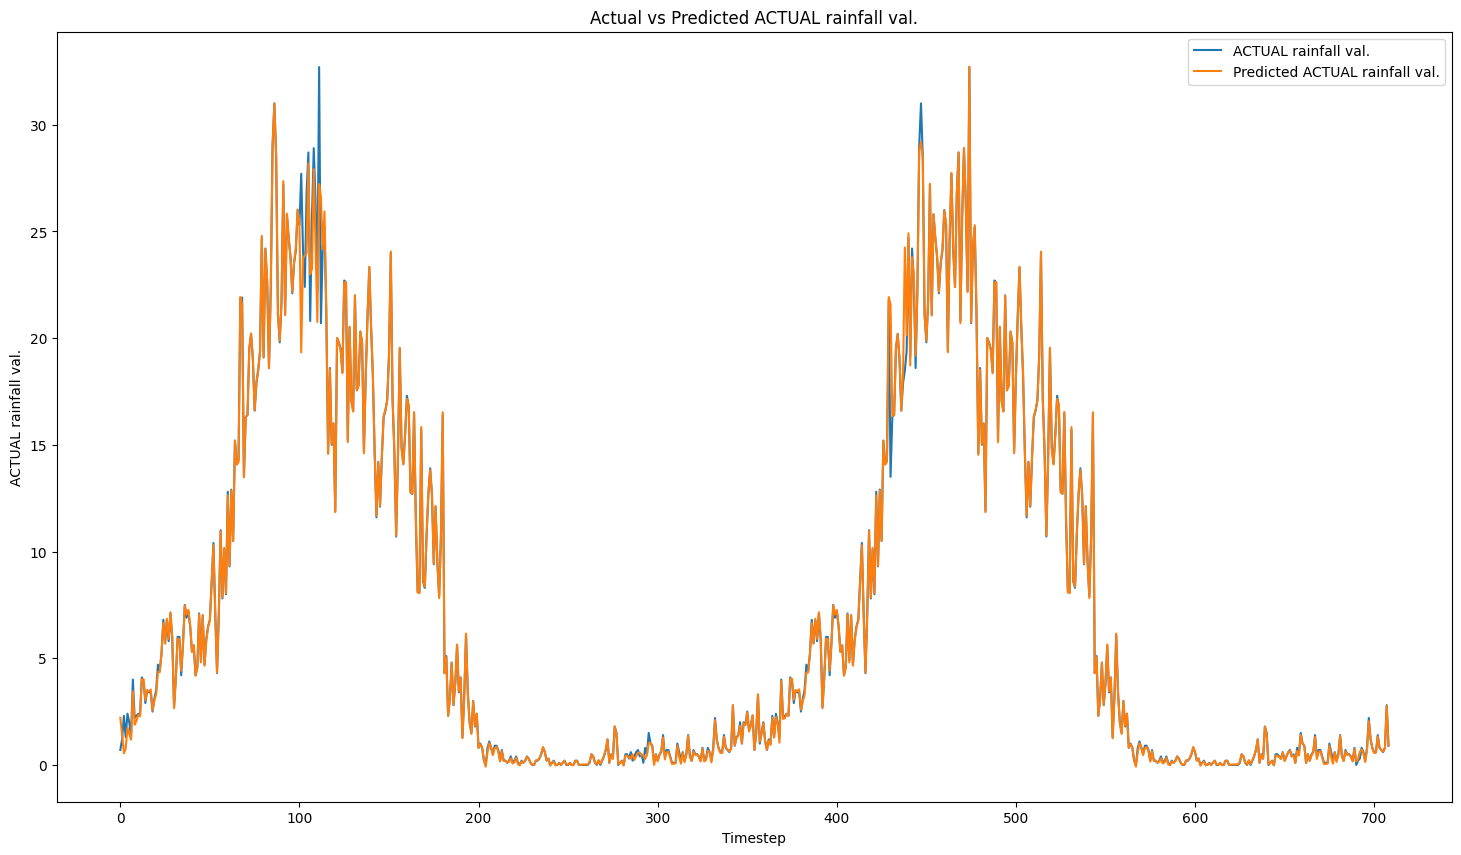

In [17]:
trainer.predict_plot()

In [18]:
trainer.evaluate_model()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Mean Squared Error (MSE): 0.3938386864014491
Root Mean Squared Error (RMSE): 0.6275656829380085
Mean Absolute Error (MAE): 0.13549187181698752
R-squared (R2): 0.9947857840868308
Mean Absolute Percentage Error (MAPE): 7.21%
Adjusted Model Accuracy: 92.79%


In [19]:
trainer.save_model()

Model saved to C:/Users/TATHAGATA GHOSH/Desktop/LSTM_Weather_Flood_Drought/Core/Pretrained_model/model_rainfall.h5


In [20]:
trainer.load_model()

Model loaded from C:/Users/TATHAGATA GHOSH/Desktop/LSTM_Weather_Flood_Drought/Core/Pretrained_model/model_rainfall.h5
